## Funcional

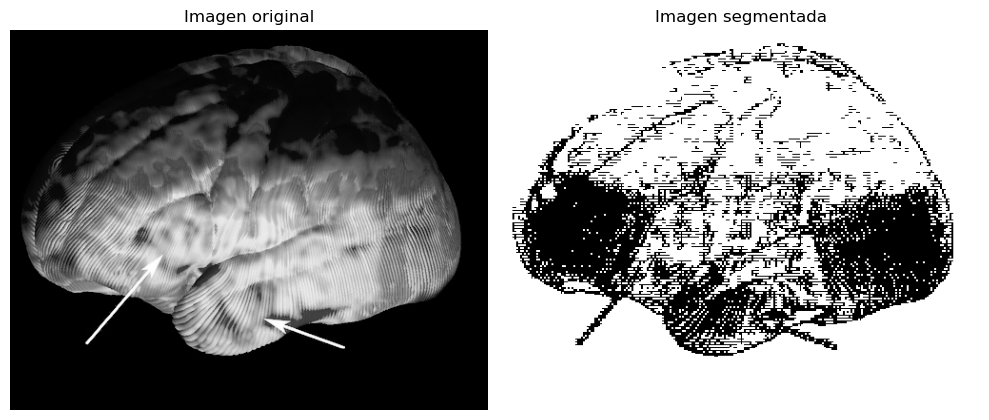

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_homogeneous(region, threshold):
    min_val, max_val = np.min(region), np.max(region)
    return (max_val - min_val) <= threshold

def split_and_merge(image, threshold):
    def recursive_split(region):
        rows, cols = region.shape
        if rows <= 1 or cols <= 1:
            return np.zeros_like(region, dtype=np.uint8)
        if is_homogeneous(region, threshold):
            return np.ones_like(region, dtype=np.uint8)
        mid_row, mid_col = rows // 2, cols // 2
        top_left = region[:mid_row, :mid_col]
        top_right = region[:mid_row, mid_col:]
        bottom_left = region[mid_row:, :mid_col]
        bottom_right = region[mid_row:, mid_col:]
        segmented_quadrants = np.zeros_like(region, dtype=np.uint8)
        segmented_quadrants[:mid_row, :mid_col] = recursive_split(top_left)
        segmented_quadrants[:mid_row, mid_col:] = recursive_split(top_right)
        segmented_quadrants[mid_row:, :mid_col] = recursive_split(bottom_left)
        segmented_quadrants[mid_row:, mid_col:] = recursive_split(bottom_right)
        return segmented_quadrants

    def merge_regions(segmented):
        # Placeholder function for merging adjacent regions if needed
        return segmented

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    segmented_image = recursive_split(image)
    segmented_image = merge_regions(segmented_image)
    return segmented_image

def main():
    file_path = "assets/adhd_brain.jpeg"
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    threshold = 20  # Adjust this value as needed
    result = split_and_merge(image, threshold)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Imagen original')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Imagen segmentada')
    plt.imshow(result * 255, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

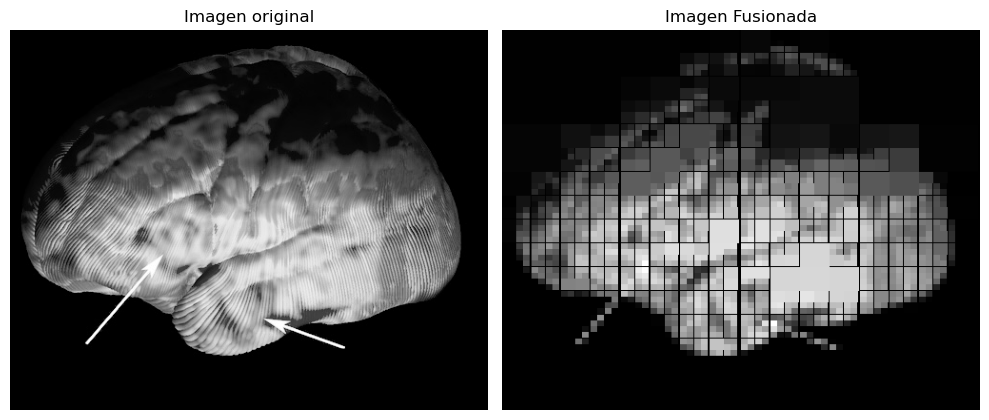

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
THRESHOLD = 300  # umbral de varianza para dividir
MIN_SIZE = 8    # tamaño mínimo de región

# Criterio de homogeneidad: varianza por debajo del umbral
def is_homogeneous(region):
    return np.var(region) < THRESHOLD

# División recursiva
def split(img, x, y, w, h):
    region = img[y:y+h, x:x+w]

    if w <= MIN_SIZE or h <= MIN_SIZE or is_homogeneous(region):
        return [(x, y, w, h)]
    
    w2, h2 = w // 2, h // 2
    regions = []
    regions += split(img, x, y, w2, h2)
    regions += split(img, x + w2, y, w2, h2)
    regions += split(img, x, y + h2, w2, h2)
    regions += split(img, x + w2, y + h2, w2, h2)
    return regions

# Fusión simple (por cercanía y valor medio)
def merge(img, regions):
    canvas = np.zeros_like(img)
    for x, y, w, h in regions:
        region = img[y:y+h, x:x+w]
        mean_val = int(np.mean(region))
        canvas[y:y+h, x:x+w] = mean_val
    return canvas

# Cargar imagen en escala de grises
image = cv2.imread('assets/adhd_brain.jpeg', cv2.IMREAD_GRAYSCALE)
h, w = image.shape

# Aplicar Split & Merge
regions = split(image, 0, 0, w, h)
segmented = merge(image, regions)

# Mostrar resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Fusionada")
plt.imshow(segmented, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
